#### This notebook trains our baseline model

Imports

In [2]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
os.chdir("../models")
from model import CustomCNN
from common_utils import set_seed, EarlyStopper, train, get_mean_rgb, CustomTransform

# set seed
set_seed(42)

Initialise model and dataset

In [6]:
model = CustomCNN() # initialise model

transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=get_mean_rgb(datasets.Flowers102(root='../data', split='test', download=True, transform=transforms.ToTensor())), std=[1,1,1])
])

# load data
train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform)
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

batch_size = 128
# initialise dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Specify hyperparameters

In [9]:
lr = 0.001 # learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # initialise optimiser
loss = torch.nn.CrossEntropyLoss() # initialise loss function

if torch.cuda.is_available(): # nvidia gpu
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # apple gpu
    device = torch.device("mps")
else:
    device = torch.device("cpu")
model.to(device)

epochs = 300 # number of epochs
early_stopper = EarlyStopper(patience=10) # initialise early stopper


# Make directory to save baseline model
baseline_model_path = "./saved_models/baseline_model/non_preprocessed"
if not os.path.exists(baseline_model_path):
    os.makedirs(baseline_model_path, exist_ok=True)

# Define the device-specific path
device_type = None
if device == torch.device("cuda"):
    device_type = "cuda"
elif device == torch.device("mps"):
    device_type = "mps"
else:
    device_type = "cpu"

# Construct the full path
device_path = os.path.join(baseline_model_path, device_type)

# Create the directory if it doesn't exist
if not os.path.exists(device_path):
    os.mkdir(device_path)

Train the model

In [10]:
train_loss_list, val_loss_list, val_acc_list = train(model, train_dataloader, val_dataloader, optimiser, loss, device, epochs, early_stopper, device_path) # train model

Epoch 1/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:39<00:00,  1.24it/s, Training loss=4.4974]


Epoch 1/300 took 43.57s | Train loss: 4.4974 | Val loss: 4.7475 | Val accuracy: 0.98% | EarlyStopper count: 0


Epoch 2/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=4.3321]


Epoch 2/300 took 32.62s | Train loss: 4.3321 | Val loss: 4.6522 | Val accuracy: 1.96% | EarlyStopper count: 0


Epoch 3/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.70it/s, Training loss=4.1225]


Epoch 3/300 took 32.48s | Train loss: 4.1225 | Val loss: 4.3954 | Val accuracy: 1.96% | EarlyStopper count: 0


Epoch 4/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:30<00:00,  1.59it/s, Training loss=4.0112]


Epoch 4/300 took 34.91s | Train loss: 4.0112 | Val loss: 4.3719 | Val accuracy: 2.35% | EarlyStopper count: 0


Epoch 5/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:31<00:00,  1.56it/s, Training loss=3.9517]


Epoch 5/300 took 35.37s | Train loss: 3.9517 | Val loss: 4.2153 | Val accuracy: 2.45% | EarlyStopper count: 0


Epoch 6/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:30<00:00,  1.60it/s, Training loss=3.8526]


Epoch 6/300 took 34.50s | Train loss: 3.8526 | Val loss: 4.1074 | Val accuracy: 3.14% | EarlyStopper count: 0


Epoch 7/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:30<00:00,  1.62it/s, Training loss=3.7591]


Epoch 7/300 took 33.93s | Train loss: 3.7591 | Val loss: 4.2249 | Val accuracy: 3.14% | EarlyStopper count: 0


Epoch 8/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=3.6652]


Epoch 8/300 took 32.28s | Train loss: 3.6652 | Val loss: 4.0002 | Val accuracy: 5.98% | EarlyStopper count: 1


Epoch 9/300: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=3.5114]


Epoch 9/300 took 32.69s | Train loss: 3.5114 | Val loss: 3.7173 | Val accuracy: 6.96% | EarlyStopper count: 0


Epoch 10/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.69it/s, Training loss=3.4012]


Epoch 10/300 took 32.66s | Train loss: 3.4012 | Val loss: 3.7289 | Val accuracy: 7.16% | EarlyStopper count: 0


Epoch 11/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=3.2664]


Epoch 11/300 took 32.78s | Train loss: 3.2664 | Val loss: 3.4095 | Val accuracy: 11.76% | EarlyStopper count: 1


Epoch 12/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=3.1132]


Epoch 12/300 took 32.73s | Train loss: 3.1132 | Val loss: 3.4009 | Val accuracy: 12.55% | EarlyStopper count: 0


Epoch 13/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.66it/s, Training loss=3.0476]


Epoch 13/300 took 33.17s | Train loss: 3.0476 | Val loss: 3.8957 | Val accuracy: 10.69% | EarlyStopper count: 0


Epoch 14/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.72it/s, Training loss=3.1077]


Epoch 14/300 took 31.99s | Train loss: 3.1077 | Val loss: 3.1835 | Val accuracy: 18.04% | EarlyStopper count: 1


Epoch 15/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.70it/s, Training loss=2.8520]


Epoch 15/300 took 32.55s | Train loss: 2.8520 | Val loss: 3.8772 | Val accuracy: 11.47% | EarlyStopper count: 0


Epoch 16/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.65it/s, Training loss=2.9085]


Epoch 16/300 took 33.31s | Train loss: 2.9085 | Val loss: 3.0671 | Val accuracy: 20.39% | EarlyStopper count: 1


Epoch 17/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.65it/s, Training loss=2.7161]


Epoch 17/300 took 33.31s | Train loss: 2.7161 | Val loss: 3.1014 | Val accuracy: 20.49% | EarlyStopper count: 0


Epoch 18/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=2.6182]


Epoch 18/300 took 32.95s | Train loss: 2.6182 | Val loss: 2.8546 | Val accuracy: 23.92% | EarlyStopper count: 1


Epoch 19/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.67it/s, Training loss=2.4834]


Epoch 19/300 took 33.00s | Train loss: 2.4834 | Val loss: 2.7765 | Val accuracy: 27.06% | EarlyStopper count: 0


Epoch 20/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=2.4685]


Epoch 20/300 took 32.79s | Train loss: 2.4685 | Val loss: 2.6430 | Val accuracy: 29.02% | EarlyStopper count: 0


Epoch 21/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.69it/s, Training loss=2.3394]


Epoch 21/300 took 32.61s | Train loss: 2.3394 | Val loss: 2.8277 | Val accuracy: 26.67% | EarlyStopper count: 0


Epoch 22/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=2.3129]


Epoch 22/300 took 32.67s | Train loss: 2.3129 | Val loss: 2.6712 | Val accuracy: 30.10% | EarlyStopper count: 1


Epoch 23/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=2.1788]


Epoch 23/300 took 32.69s | Train loss: 2.1788 | Val loss: 2.5071 | Val accuracy: 31.76% | EarlyStopper count: 2


Epoch 24/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=2.1377]


Epoch 24/300 took 32.86s | Train loss: 2.1377 | Val loss: 2.5224 | Val accuracy: 34.02% | EarlyStopper count: 0


Epoch 25/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=2.0649]


Epoch 25/300 took 32.88s | Train loss: 2.0649 | Val loss: 2.3956 | Val accuracy: 37.06% | EarlyStopper count: 1


Epoch 26/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=1.9944]


Epoch 26/300 took 32.88s | Train loss: 1.9944 | Val loss: 2.8939 | Val accuracy: 30.29% | EarlyStopper count: 0


Epoch 27/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=2.0470]


Epoch 27/300 took 32.89s | Train loss: 2.0470 | Val loss: 2.4109 | Val accuracy: 37.65% | EarlyStopper count: 1


Epoch 28/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.67it/s, Training loss=1.8184]


Epoch 28/300 took 32.99s | Train loss: 1.8184 | Val loss: 2.2932 | Val accuracy: 40.00% | EarlyStopper count: 2


Epoch 29/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=1.7724]


Epoch 29/300 took 32.87s | Train loss: 1.7724 | Val loss: 2.2390 | Val accuracy: 40.49% | EarlyStopper count: 0


Epoch 30/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.69it/s, Training loss=1.6491]


Epoch 30/300 took 32.64s | Train loss: 1.6491 | Val loss: 2.3200 | Val accuracy: 41.37% | EarlyStopper count: 0


Epoch 31/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.67it/s, Training loss=1.6291]


Epoch 31/300 took 33.20s | Train loss: 1.6291 | Val loss: 2.3246 | Val accuracy: 41.57% | EarlyStopper count: 1


Epoch 32/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.66it/s, Training loss=1.5823]


Epoch 32/300 took 33.09s | Train loss: 1.5823 | Val loss: 2.4091 | Val accuracy: 39.71% | EarlyStopper count: 2


Epoch 33/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.70it/s, Training loss=1.5439]


Epoch 33/300 took 32.40s | Train loss: 1.5439 | Val loss: 2.1933 | Val accuracy: 42.94% | EarlyStopper count: 3


Epoch 34/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.67it/s, Training loss=1.4934]


Epoch 34/300 took 33.09s | Train loss: 1.4934 | Val loss: 2.2324 | Val accuracy: 43.82% | EarlyStopper count: 0


Epoch 35/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.68it/s, Training loss=1.2996]


Epoch 35/300 took 32.67s | Train loss: 1.2996 | Val loss: 2.2792 | Val accuracy: 43.33% | EarlyStopper count: 1


Epoch 36/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:29<00:00,  1.69it/s, Training loss=1.3338]


Epoch 36/300 took 32.62s | Train loss: 1.3338 | Val loss: 2.7317 | Val accuracy: 38.33% | EarlyStopper count: 2


Epoch 37/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=1.4467]


Epoch 37/300 took 32.34s | Train loss: 1.4467 | Val loss: 2.3016 | Val accuracy: 43.33% | EarlyStopper count: 3


Epoch 38/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.70it/s, Training loss=1.2723]


Epoch 38/300 took 32.45s | Train loss: 1.2723 | Val loss: 2.2011 | Val accuracy: 44.80% | EarlyStopper count: 4


Epoch 39/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=1.0600]


Epoch 39/300 took 32.24s | Train loss: 1.0600 | Val loss: 2.2942 | Val accuracy: 45.78% | EarlyStopper count: 5


Epoch 40/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=0.9871]


Epoch 40/300 took 32.30s | Train loss: 0.9871 | Val loss: 2.3419 | Val accuracy: 46.67% | EarlyStopper count: 6


Epoch 41/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.70it/s, Training loss=0.9392]


Epoch 41/300 took 32.37s | Train loss: 0.9392 | Val loss: 2.3134 | Val accuracy: 48.63% | EarlyStopper count: 7


Epoch 42/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=0.8867]


Epoch 42/300 took 32.29s | Train loss: 0.8867 | Val loss: 2.3222 | Val accuracy: 47.75% | EarlyStopper count: 8


Epoch 43/300: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s, Training loss=0.8722]


Epoch 43/300 took 32.32s | Train loss: 0.8722 | Val loss: 2.4372 | Val accuracy: 46.67% | EarlyStopper count: 9
Early stopping


Plot train, test loss and test accuracy

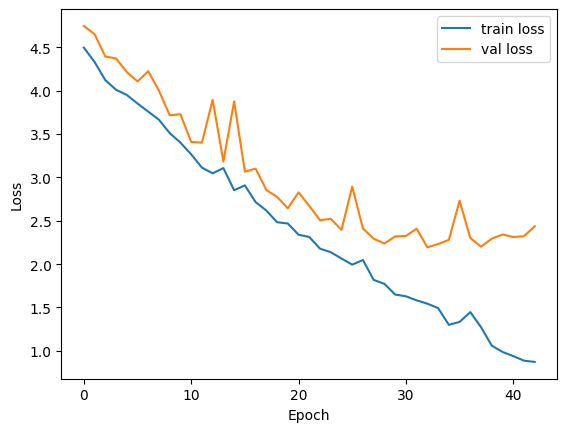

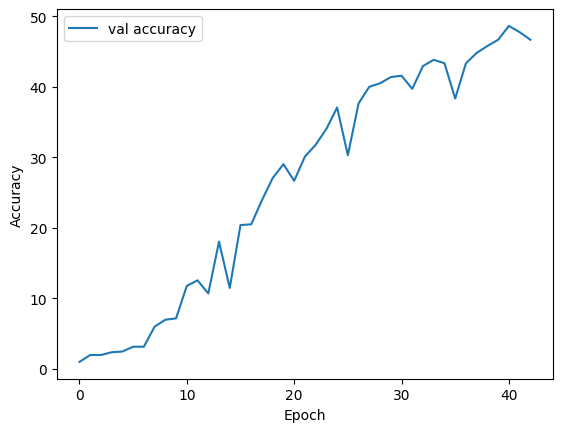

In [12]:
# plot the graphs
import matplotlib.pyplot as plt
plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(val_acc_list, label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()